# Подготовительные моменты

Подключение необходимых библиотек.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
sns.set_theme()

Создание DataFrame из csv-файла с данными о пингвинах.

In [2]:
penguins = pd.read_csv("penguins.csv")

# Первый взгляд на набор данных

Набор данных о пингвинах содержит следующие признаки:
- species - название вида, к которому принадлежит пингвин;
- island - название острова, на котором живёт пингвин;
- bill_length_mm - длина клюва в миллиметрах;
- bill_depth_mm - толщина клюва в миллиметрах;
- flipper_length_mm - длина плавника в миллиметрах;
- body_mass_g - масса тела в граммах;
- sex - пол пингвина.

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


Просмотр основных числовых характеристик количественных признаков, а именно для каждого столбца подсчитываются: количество непустых записей, среднее значение, среднее квадратическое отклонение, минимальное значение, первый квартиль, второй квартиль (медиана), третий квартиль и максимальное значение.

In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Просмотр основных числовых характеристик категориальных признаков, а именно для каждого столбца подсчитываются: количество непустых записей, количество уникальных записей, самая частая запись и ее частота.

In [ ]:
penguins.describe(include="object")

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


Просмотр количества пропусков в данных. Видно, что есть 2 пингвина, у которых отсутствуют все количественные признаки, а также 9 пингвинов, у которых из всех признаков отсутствует только пол.

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Визуализация распределений значений признаков

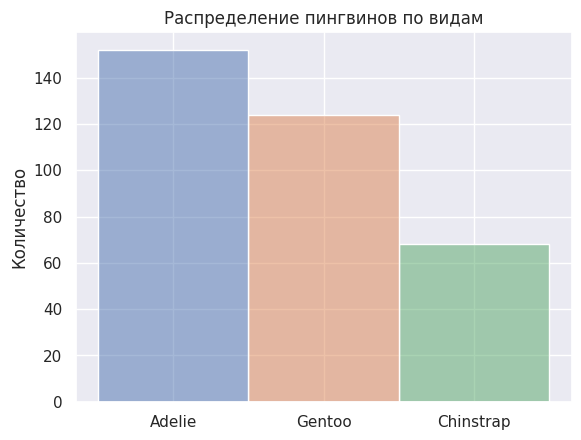

In [ ]:
sns.histplot(penguins, x=penguins.species, hue="species", legend=None).set(
    title="Распределение пингвинов по видам", xlabel="", ylabel="Количество"
);

Из полученной диаграммы видно, что в наборе данных представлено три вида пингвинов: Adelie, Gentoo, Chinstrap. Представителей видов Adelie и Gentoo достаточно много, а пингвинов вида Chinstrap значительно меньше.

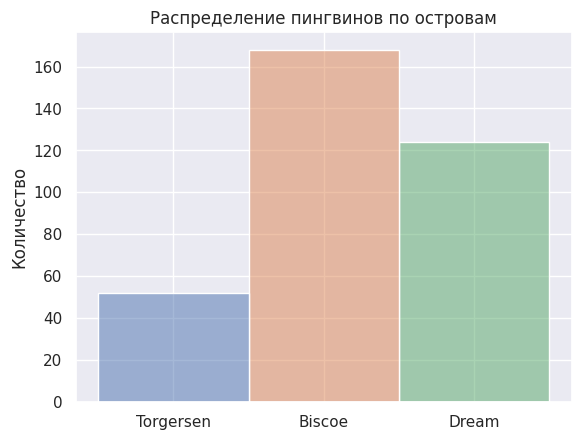

In [ ]:
sns.histplot(penguins, x=penguins.island, hue="island", legend=None).set(
    title="Распределение пингвинов по островам", xlabel="", ylabel="Количество"
);

Из полученной диаграммы видно, что пингвины, представленные в наборе данных, обитают на трёх островах: Torgersen, Biscoe, Dream. Обитателей островов Biscoe и Dream достаточно много, а пингвинов на острове Torgersen значительно меньше.

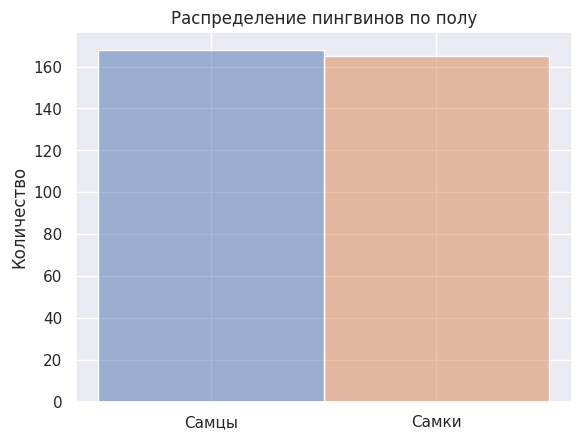

In [ ]:
labels_sex = ["Самцы", "Самки"]
sns.histplot(penguins, x=penguins.sex, hue="sex", legend=None).set(
    title="Распределение пингвинов по полу", xlabel="", ylabel="Количество",
    xticks=range(2), xticklabels=labels_sex
);

Из полученной диаграммы видно, что в наборе данных представлено почти равное количество особей обеих полов.

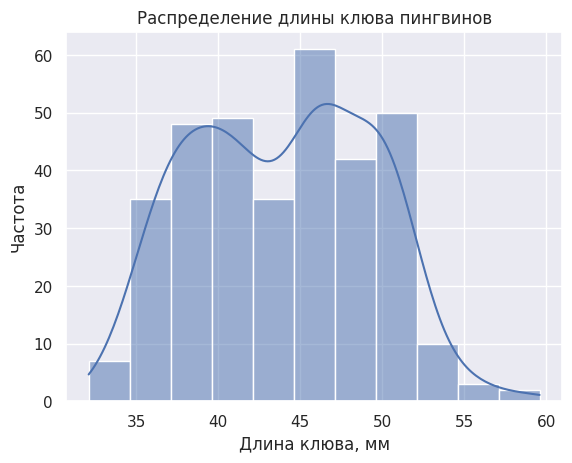

In [ ]:
sns.histplot(penguins.bill_length_mm, kde=True).set(
    title="Распределение длины клюва пингвинов", xlabel="Длина клюва, мм", ylabel="Частота"
);

Из полученной диаграммы видно, что распределение значений длины клюва пингвинов близко к нормальному. Притом можно достаточно явно выделить как минимум два вида пингвинов.

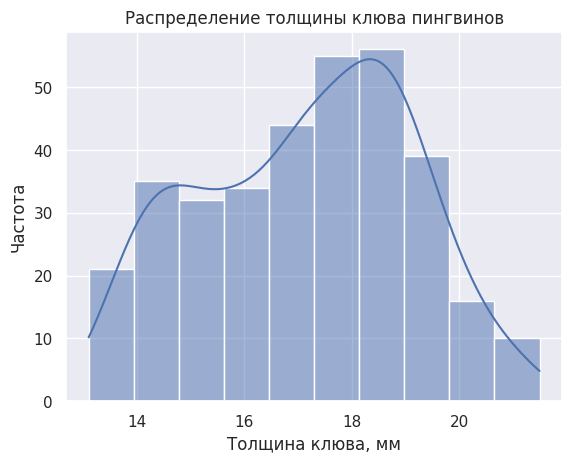

In [ ]:
sns.histplot(penguins.bill_depth_mm, kde=True).set(
    title="Распределение толщины клюва пингвинов", xlabel="Толщина клюва, мм", ylabel="Частота"
);

Из полученной диаграммы видно, что распределение значений толщины клюва пингвинов близко к нормальному.

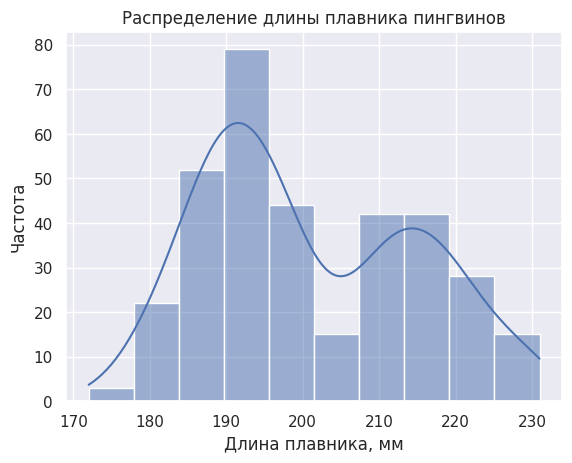

In [ ]:
sns.histplot(penguins.flipper_length_mm, kde=True).set(
    title="Распределение длины плавника пингвинов", xlabel="Длина плавника, мм", ylabel="Частота"
);

Из полученной диаграммы видно, что распределение значений длины плавников пингвинов близко к нормальному. Притом можно достаточно явно выделить как минимум два вида пингвинов.

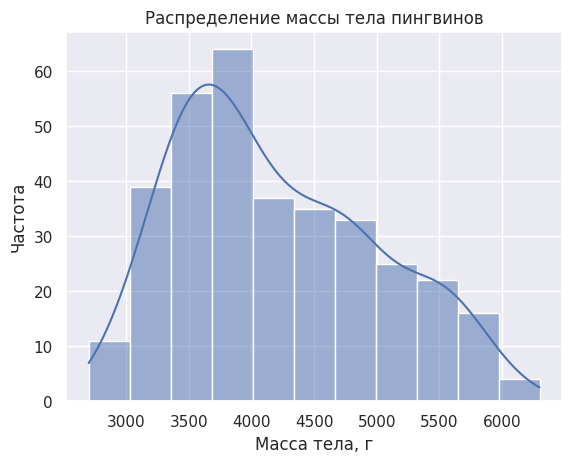

In [ ]:
sns.histplot(penguins.body_mass_g, kde=True).set(
    title="Распределение массы тела пингвинов", xlabel="Масса тела, г", ylabel="Частота"
);

Из полученной диаграммы видно, что распределение массы тела пингвинов близко к нормальному.

# Выявление зависимостей между признаками

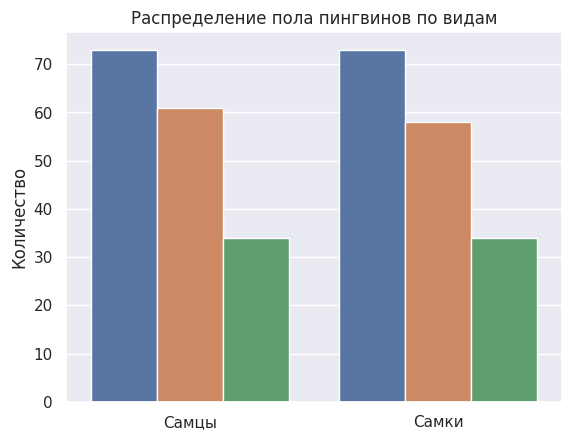

In [ ]:
sns.countplot(penguins, x=penguins.sex, hue="species", legend=None).set(
    title="Распределение пола пингвинов по видам", xlabel="", ylabel="Количество",
    xticks=range(2), xticklabels=labels_sex
);

Из полученной диаграммы видно, что в наборе данных представлено почти равное количество особей обоих полов для каждого из трёх видов.

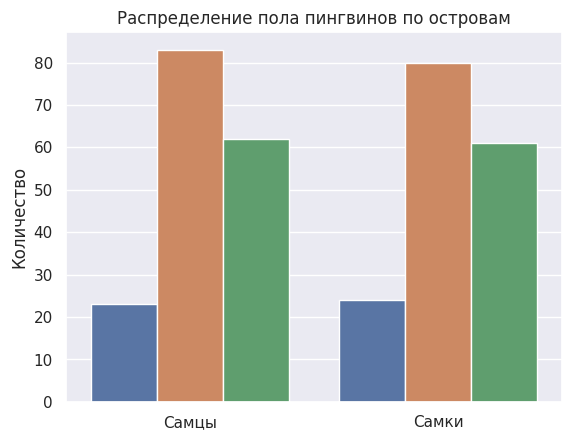

In [ ]:
sns.countplot(penguins, x=penguins.sex, hue="island", legend=None).set(
    title="Распределение пола пингвинов по островам", xlabel="", ylabel="Количество",
    xticks=range(2), xticklabels=labels_sex
);

Из полученной диаграммы видно, что в наборе данных представлено почти равное количество особей обоих полов для каждого из трёх островов.

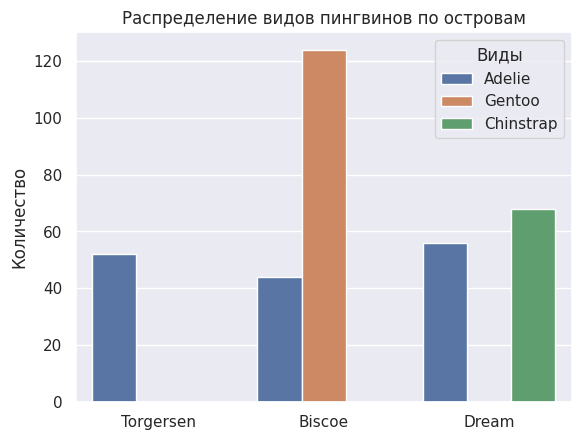

In [ ]:
sns.countplot(penguins, x=penguins.island, hue="species").set(
    title="Распределение видов пингвинов по островам", xlabel="", ylabel="Количество"
)
plt.legend(title="Виды");

Из полученной диаграммы видно, что пингвины вида Adelie примерно в равной степени распределены по всем островам, пигвины вида Gentoo живут только на острове Biscoe, а пингвины вида Chinstrap живут только на острове Dream.

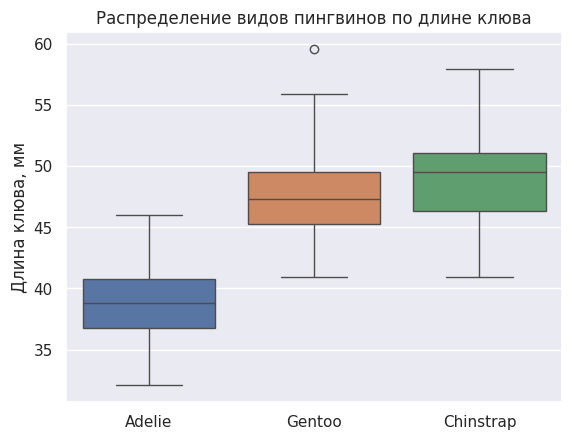

In [ ]:
sns.boxplot(penguins, x=penguins.species, y=penguins.bill_length_mm, hue="species").set(
    title="Распределение видов пингвинов по длине клюва", xlabel="", ylabel="Длина клюва, мм"
);

Из полученной диаграммы видно, что средняя длина клюва пингвинов вида Adelie значительно меньше, чем у двух других видов. Также видно, что один из пингвинов вида Gentoo имеет очень длинный клюв.

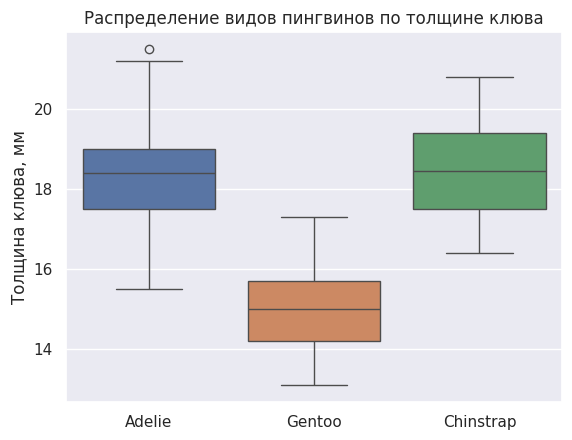

In [ ]:
sns.boxplot(penguins, x=penguins.species, y=penguins.bill_depth_mm, hue="species").set(
    title="Распределение видов пингвинов по толщине клюва", xlabel="", ylabel="Толщина клюва, мм"
);

Из полученной диаграммы видно, что средняя толщина клюва пингвинов вида Gentoo значительно меньше, чем у двух других видов. Также видно, что один из пингвинов вида Adelie имеет достаточно толстый клюв.

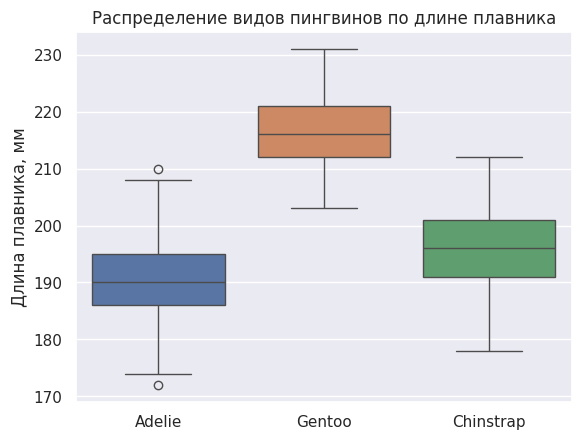

In [ ]:
sns.boxplot(penguins, x=penguins.species, y=penguins.flipper_length_mm, hue="species").set(
    title="Распределение видов пингвинов по длине плавника", xlabel="", ylabel="Длина плавника, мм"
);

Из полученной диаграммы видно, что средняя длина плавника пингвинов вида Gentoo значительно больше, чем у двух других видов. Также видно, что выделяются двое пингвинов вида Adelie. Один из них имеет длину плавников немного больше остальных, а другой немного меньше остальных.

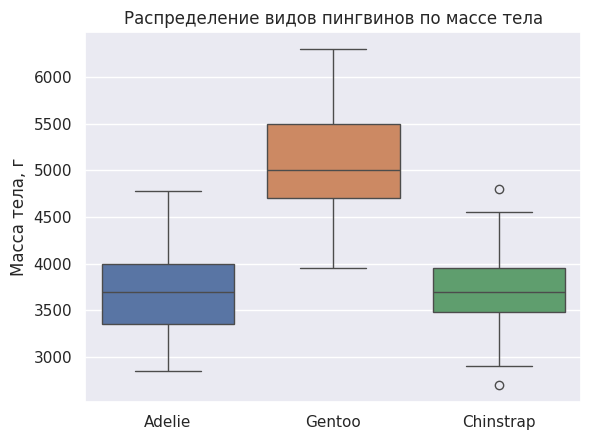

In [ ]:
sns.boxplot(penguins, x=penguins.species, y=penguins.body_mass_g, hue="species").set(
    title="Распределение видов пингвинов по массе тела", xlabel="", ylabel="Масса тела, г"
);

Из полученной диаграммы видно, что средняя масса тела пингвинов вида Gentoo значительно больше, чем у двух других видов. Также видно, что выделяются двое пингвинов вида Chinstrap. Один из них весит немного больше остальных, а другой немного меньше остальных.

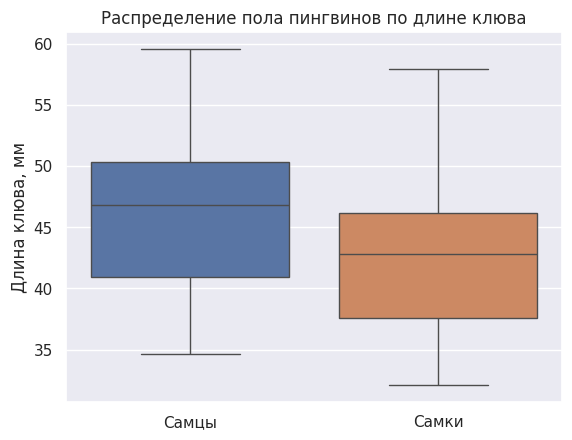

In [ ]:
sns.boxplot(penguins, x=penguins.sex, y=penguins.bill_length_mm, hue="sex", legend=None).set(
    title="Распределение пола пингвинов по длине клюва", xlabel="", ylabel="Длина клюва, мм",
    xticks=range(2), xticklabels=labels_sex
);

Из полученной диаграммы видно, что длина клюва у самцов преимущественно больше, чем у самок.

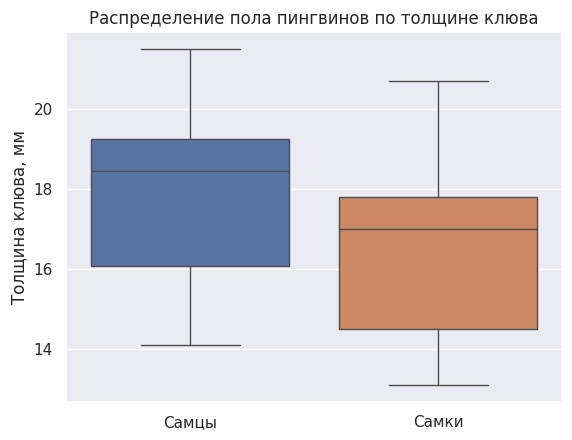

In [ ]:
sns.boxplot(penguins, x=penguins.sex, y=penguins.bill_depth_mm, hue="sex", legend=None).set(
    title="Распределение пола пингвинов по толщине клюва", xlabel="", ylabel="Толщина клюва, мм",
    xticks=range(2), xticklabels=labels_sex
);

Из полученной диаграммы видно, что толщинка клюва у самцов преимущественно больше, чем у самок.

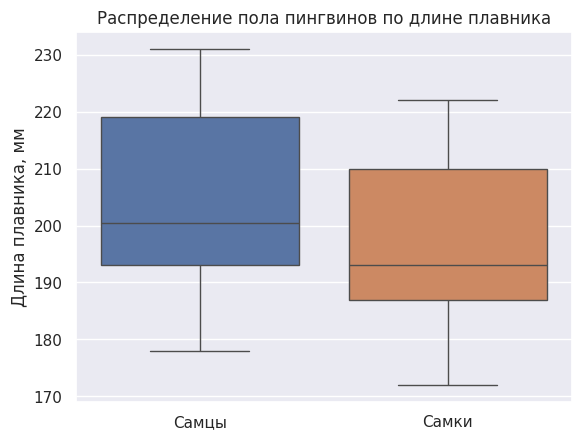

In [ ]:
sns.boxplot(penguins, x=penguins.sex, y=penguins.flipper_length_mm, hue="sex", legend=None).set(
    title="Распределение пола пингвинов по длине плавника", xlabel="", ylabel="Длина плавника, мм",
    xticks=range(2), xticklabels=labels_sex
);

Из полученной диаграммы видно, что длина плавника у самцов преимущественно больше, чем у самок.

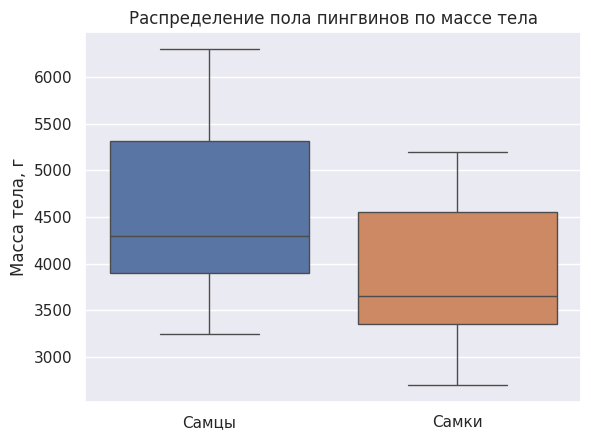

In [ ]:
sns.boxplot(penguins, x=penguins.sex, y=penguins.body_mass_g, hue="sex", legend=None).set(
    title="Распределение пола пингвинов по массе тела", xlabel="", ylabel="Масса тела, г",
    xticks=range(2), xticklabels=labels_sex
);

Из полученной диаграммы видно, что масса тела у самцов преимущественно больше, чем у самок.

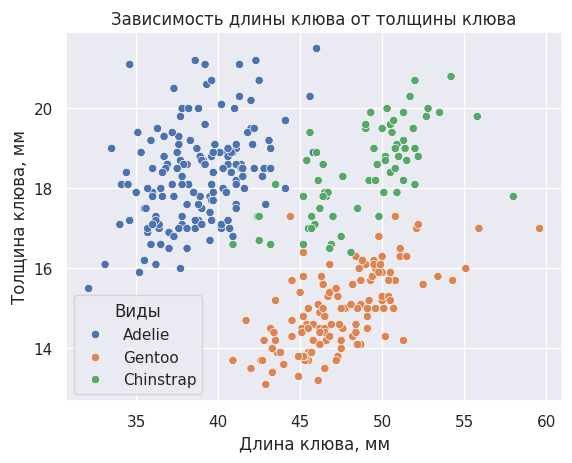

In [ ]:
sns.scatterplot(penguins, x=penguins.bill_length_mm, y=penguins.bill_depth_mm, hue="species").set(
    title="Зависимость длины клюва от толщины клюва", xlabel="Длина клюва, мм", ylabel="Толщина клюва, мм"
)
plt.legend(title="Виды");

Из полученного графика видно, что между длиной клюва и толщиной клюва нет зависимости.

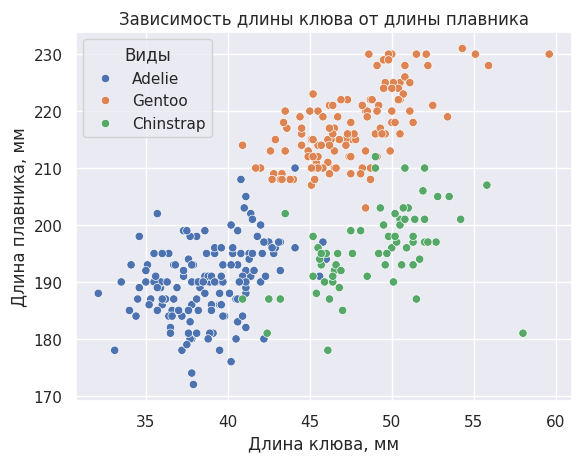

In [ ]:
sns.scatterplot(penguins, x=penguins.bill_length_mm, y=penguins.flipper_length_mm, hue="species").set(
    title="Зависимость длины клюва от длины плавника", xlabel="Длина клюва, мм", ylabel="Длина плавника, мм"
)
plt.legend(title="Виды");

Из полученного графика видно, что между длиной клюва и длиной плавника есть достаточно явно выраженная зависимость — чем больше длина плавника, тем больше длина клюва.

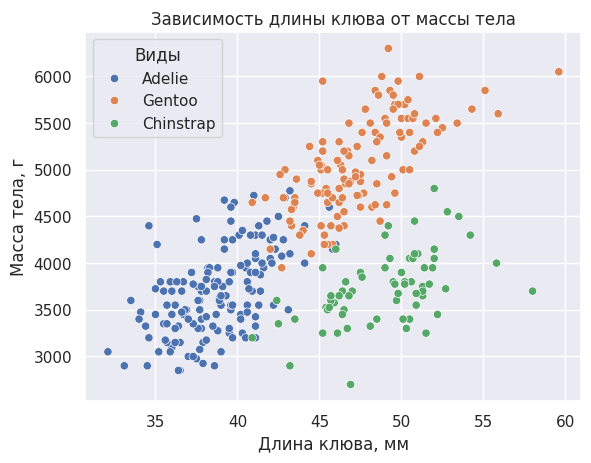

In [ ]:
sns.scatterplot(penguins, x=penguins.bill_length_mm, y=penguins.body_mass_g, hue="species").set(
    title="Зависимость длины клюва от массы тела", xlabel="Длина клюва, мм", ylabel="Масса тела, г"
)
plt.legend(title="Виды");

Из полученного графика видно, что между длиной клюва и массой тела есть достаточно явно выраженная зависимость — чем больше масса тела, тем больше длина клюва.

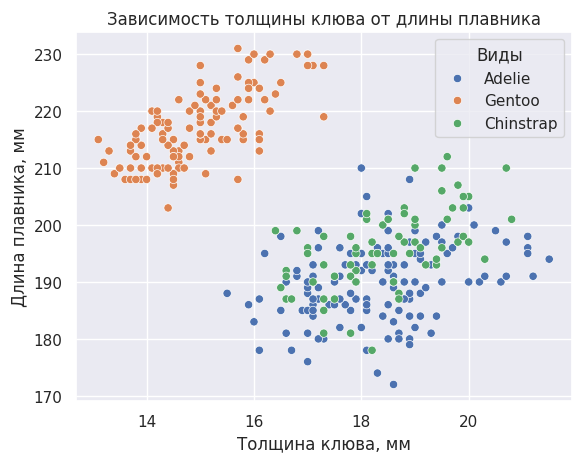

In [ ]:
sns.scatterplot(penguins, x=penguins.bill_depth_mm, y=penguins.flipper_length_mm, hue="species").set(
    title="Зависимость толщины клюва от длины плавника", xlabel="Толщина клюва, мм", ylabel="Длина плавника, мм"
)
plt.legend(title="Виды");

Из полученного графика видно, что между толщиной клюва и длиной плавника нет зависимости.

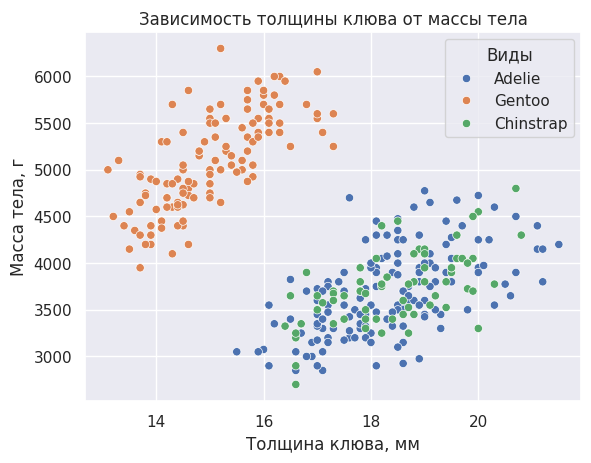

In [ ]:
sns.scatterplot(penguins, x=penguins.bill_depth_mm, y=penguins.body_mass_g, hue="species").set(
    title="Зависимость толщины клюва от массы тела", xlabel="Толщина клюва, мм", ylabel="Масса тела, г"
)
plt.legend(title="Виды");

Из полученного графика видно, что между толщиной клюва и массой тела нет зависимости.

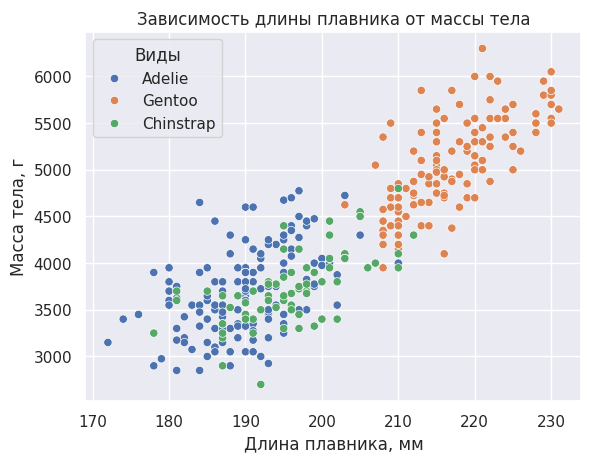

In [ ]:
sns.scatterplot(penguins, x=penguins.flipper_length_mm, y=penguins.body_mass_g, hue="species").set(
    title="Зависимость длины плавника от массы тела", xlabel="Длина плавника, мм", ylabel="Масса тела, г"
)
plt.legend(title="Виды");

Из полученного графика видно, что между длиной плавника и массой тела есть явно выраженная зависимость — чем больше масса тела, тем больше длина плавника.

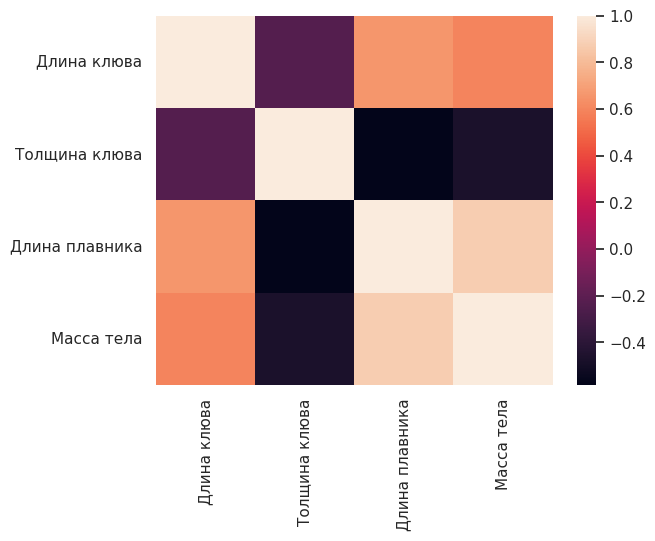

In [ ]:
labels_quantitative = ["Длина клюва", "Толщина клюва", "Длина плавника", "Масса тела"]
sns.heatmap(
    penguins.corr(numeric_only=True),
    xticklabels=labels_quantitative,
    yticklabels=labels_quantitative
);

Исходя из полученной тепловой карты зависимости количественных признаков, можно сделать вывод, что зависимости между этими признаками выявлены верно.

По данному разделу можно сделать следующие выводы:
1. Распределение пингвинов по полу равномерно.
2. Распределение видов пингвинов по островам неравномерно. Один из островов заселён только одним видом пингвинов, в то время как другие два острова делят между собой два разных вида пингвинов.
3. Можно выделить следующие особенности, присущие видам:
  - пингвины вида Adelie имеют короткие и толстые клювы, короткие плавники и сравнительно небольшую массу тела;
  - пингвины вида Gentoo имеют длинные и тонкие клювы, длинные плавники и сравнительно большую массу тела;
  - пингвины вида Chinstrap имеют длинные и толстые клювы, короткие плавники и сравнительно небольшую массу тела.
4. Самцы по всем признакам преимущественно крупнее самок.
5. Наиболее ярко выражена зависимость между длиной плавника и массой тела.


# Нормализация

Применим Min-Max нормализацию ко всем количественным признакам набора данных.

In [ ]:
min_max_scaler = MinMaxScaler()
columns = list(penguins.columns.values[2:-1])
penguins_norm = penguins.copy()
penguins_norm[columns] = min_max_scaler.fit_transform(penguins_norm[columns])
penguins_norm

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,0.861818,0.797619,0.593220,0.361111,male
340,Chinstrap,Dream,0.414545,0.595238,0.508475,0.194444,female
341,Chinstrap,Dream,0.636364,0.607143,0.355932,0.298611,male
342,Chinstrap,Dream,0.680000,0.702381,0.644068,0.388889,male


Результат нормализации на примере двух признаков. Нормализация не повлияла на построение графиков, как и должно быть.

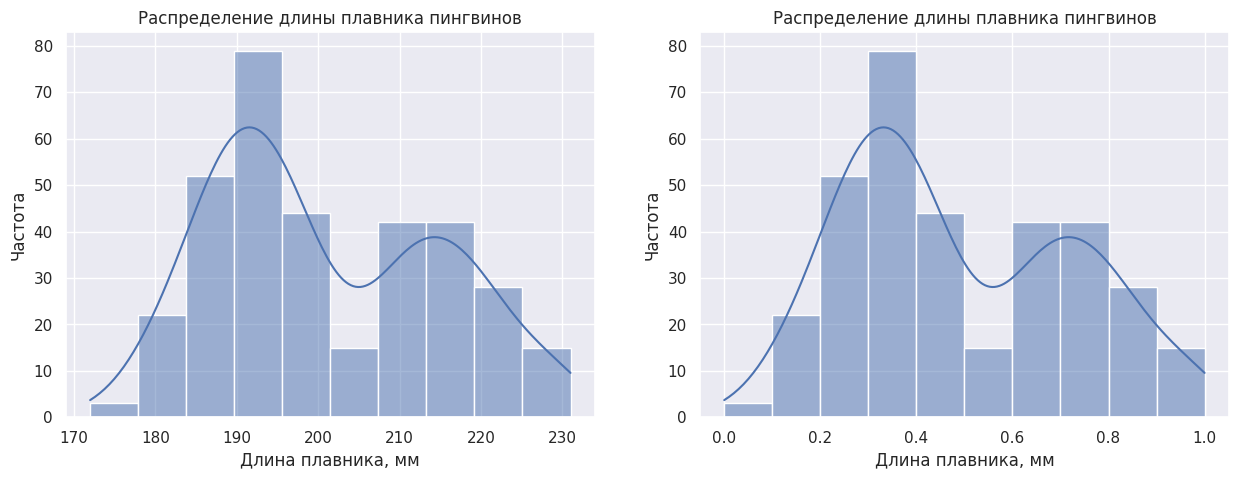

In [ ]:
_, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(penguins.flipper_length_mm, kde=True, ax=ax[0]).set(
    title="Распределение длины плавника пингвинов", xlabel="Длина плавника, мм", ylabel="Частота"
);
sns.histplot(penguins_norm.flipper_length_mm, kde=True, ax=ax[1]).set(
    title="Распределение длины плавника пингвинов", xlabel="Длина плавника, мм", ylabel="Частота"
);

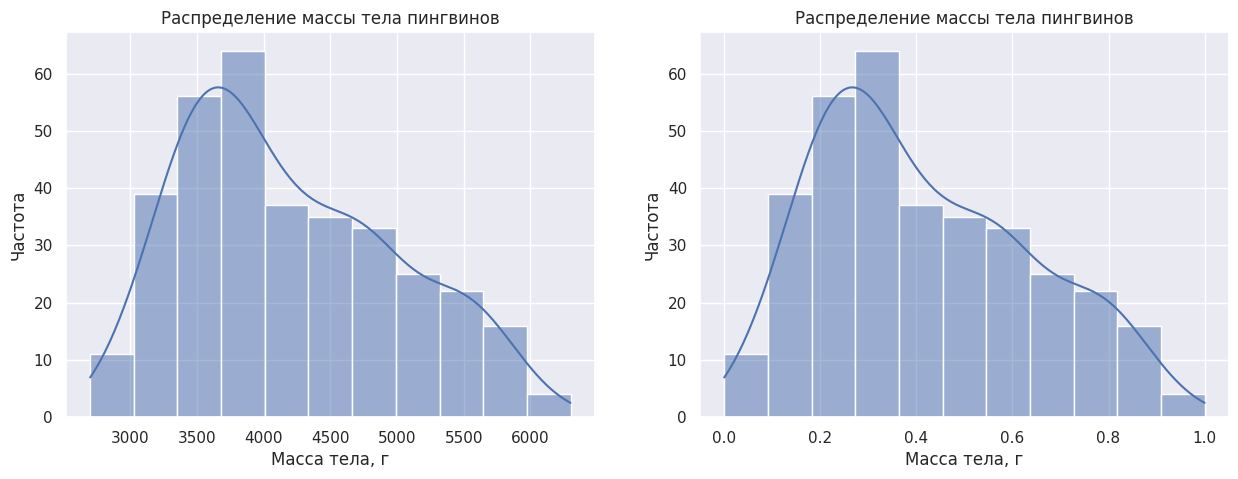

In [ ]:
_, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(penguins.body_mass_g, kde=True, ax=ax[0]).set(
    title="Распределение массы тела пингвинов", xlabel="Масса тела, г", ylabel="Частота"
);
sns.histplot(penguins_norm.body_mass_g, kde=True, ax=ax[1]).set(
    title="Распределение массы тела пингвинов", xlabel="Масса тела, г", ylabel="Частота"
);

# Кодирование категориальных признаков

Кодирование пола с помощью OrdinalEncoder, так как пол принимает всего два значения равноудалённых друг от друга.

In [ ]:
ordinal_encoder = OrdinalEncoder()
penguins_norm[["sex"]] = ordinal_encoder.fit_transform(penguins_norm[["sex"]])
penguins_norm

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,1.0
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,0.0
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,0.0
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,0.861818,0.797619,0.593220,0.361111,1.0
340,Chinstrap,Dream,0.414545,0.595238,0.508475,0.194444,0.0
341,Chinstrap,Dream,0.636364,0.607143,0.355932,0.298611,1.0
342,Chinstrap,Dream,0.680000,0.702381,0.644068,0.388889,1.0


Кодирование признаков вид и остров с помощью OneHotEncoder, так как каждый из этих признаков принимает три различных значения, которые считаются равносильными.

In [ ]:
one_hot_encoder = OneHotEncoder()
encoded_species = one_hot_encoder.fit_transform(penguins_norm[["species"]])
penguins_norm[["s_adelie", "s_chinstrap", "s_gentoo"]] = encoded_species.toarray()
encoded_island = one_hot_encoder.fit_transform(penguins_norm[["island"]])
penguins_norm[["i_biscoe", "i_dream", "i_torgersen"]] = encoded_island.toarray()
penguins_norm = penguins_norm.drop(columns=["species", "island"])
penguins_norm

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,s_adelie,s_chinstrap,s_gentoo,i_biscoe,i_dream,i_torgersen
0,0.254545,0.666667,0.152542,0.291667,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0
4,0.167273,0.738095,0.355932,0.208333,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
339,0.861818,0.797619,0.593220,0.361111,1.0,0.0,1.0,0.0,0.0,1.0,0.0
340,0.414545,0.595238,0.508475,0.194444,0.0,0.0,1.0,0.0,0.0,1.0,0.0
341,0.636364,0.607143,0.355932,0.298611,1.0,0.0,1.0,0.0,0.0,1.0,0.0
342,0.680000,0.702381,0.644068,0.388889,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Построение тепловой карты после кодирования категориальных признаков.

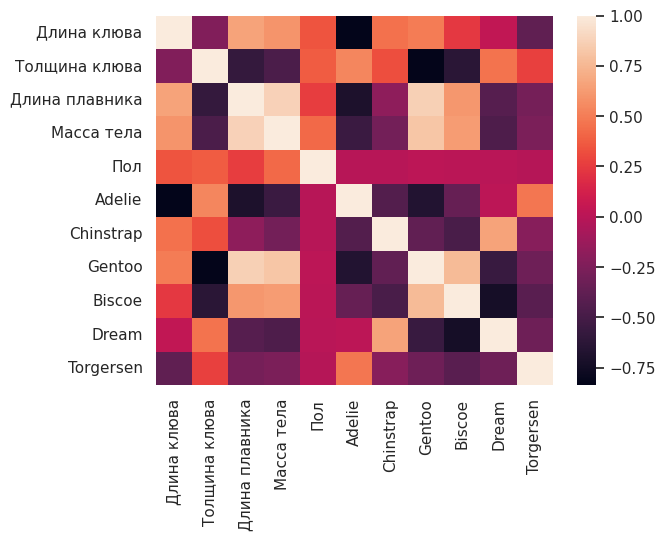

In [ ]:
labels_all = labels_quantitative + ["Пол", "Adelie", "Chinstrap", "Gentoo", "Biscoe", "Dream", "Torgersen"]
sns.heatmap(penguins_norm.corr(), xticklabels=labels_all, yticklabels=labels_all);

Исходя из полученной тепловой карты, можно сделать вывод, что пол в наибольшей степени зависит от толщины клюва и массы тела, следовательно, соотношение именно этих признаков лучше всего использовать для восстановления пропущенных записей.

# Заполнение пропущенных записей

Просмотр всех строк в наборе данных, в которых пропущено хотя бы одно значение.

In [ ]:
penguins[penguins.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Удаление двух пингвинов, у которых пропущены все значения, кроме вида и острова, так как восстановить остальные значения их количественных признаков невозможно.

In [ ]:
penguins_sex = penguins[penguins.bill_length_mm.notna()]
penguins_sex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


Замена пропущенных значений пола на значение unknown (неизвестно).

In [ ]:
penguins_sex = penguins_sex.fillna("unknown")
penguins_sex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


Создание отдельных наборов данных для пингвинов каждого вида и проверка количества пропущенных значений пола.

In [ ]:
penguins_adelie = penguins_sex[penguins_sex.species == "Adelie"]
penguins_adelie[penguins_adelie.sex == "unknown"]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,unknown
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,unknown
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,unknown
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,unknown
47,Adelie,Dream,37.5,18.9,179.0,2975.0,unknown


In [ ]:
penguins_gentoo = penguins_sex[penguins_sex.species == "Gentoo"]
penguins_gentoo[penguins_gentoo.sex == "unknown"]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,unknown
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,unknown
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,unknown
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,unknown


In [ ]:
penguins_chinstrap = penguins_sex[penguins_sex.species == "Chinstrap"]
penguins_chinstrap[penguins_chinstrap.sex == "unknown"]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


Таким образом, у 5 особей вида Adelie и 4 особей вида Gentoo пол неизвестен. У всех особей вида Chinstrap пол известен.

In [ ]:
label_male, label_female, label_unknown = "Самцы", "Самки", "Неизвестно"
hue_male, hue_female, hue_unknown = "male", "female", "unknown"
color_male, color_female, color_unknown = "#4c72b0", "#dd8452", "#55a868"
palette_sex = {hue_male: color_male, hue_female: color_female, hue_unknown: color_unknown}
marker_male = Line2D([], [], color=color_male, linestyle="None", marker=".", markersize=8)
marker_female = Line2D([], [], color=color_female, linestyle="None", marker=".", markersize=8)
marker_unknown = Line2D([], [], color=color_unknown, linestyle="None", marker=".", markersize=16)

Построение графиков зависимости толщины клюва от массы тела и восстановление пропущенных записей. Тремя разными цветами обозначены особи мужского, женского и неизвестного полов.

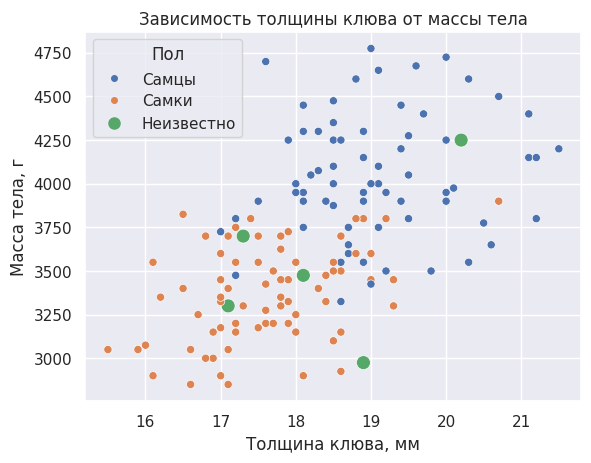

In [ ]:
sns.scatterplot(
    penguins_adelie, x=penguins_adelie.bill_depth_mm, y=penguins_adelie.body_mass_g,
    hue="sex", size="sex",
    palette=palette_sex, hue_order=[hue_male, hue_female, hue_unknown], sizes=[35, 35, 100]
).set(
    title="Зависимость толщины клюва от массы тела", xlabel="Толщина клюва, мм", ylabel="Масса тела, г"
)
plt.legend(
    handles=[marker_male, marker_female, marker_unknown],
    labels=[label_male, label_female, label_unknown],
    title="Пол"
);

Исходя из полученного графика, можно сделать предположение, что четверо пингвинов в нижней части графика являются самками, так как их ближайшими соседями являются самки, а пингвин в верхней части графика является самцом, так как его ближайшими соседями являются самцы.

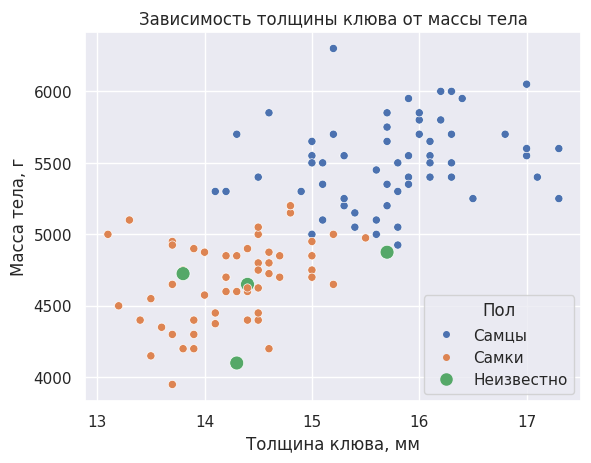

In [ ]:
sns.scatterplot(
    penguins_gentoo, x=penguins_gentoo.bill_depth_mm, y=penguins_gentoo.body_mass_g,
    hue="sex", size="sex", palette=palette_sex,
    hue_order=[hue_male, hue_female, hue_unknown], sizes=[35, 35, 100]
).set(
    title="Зависимость толщины клюва от массы тела", xlabel="Толщина клюва, мм", ylabel="Масса тела, г"
)
plt.legend(
    handles=[marker_male, marker_female, marker_unknown],
    labels=[label_male, label_female, label_unknown],
    title="Пол"
);

Исходя из полученного графика, можно сделать предположение, что трое пингвинов в нижней части графика являются самками, так как их ближайшими соседями являются самки, а пингвин, находящийся рядом с центром графика, является самцом, так как хоть он и расположен на границе двух кластеров, но всё же немного ближе к самцам.

In [ ]:
penguins_adelie[penguins_adelie.sex == "unknown"]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,unknown
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,unknown
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,unknown
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,unknown
47,Adelie,Dream,37.5,18.9,179.0,2975.0,unknown


In [ ]:
penguins_gentoo[penguins_gentoo.sex == "unknown"]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,unknown
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,unknown
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,unknown
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,unknown


Теперь необходимо соотнести толщину клюва и массу тела каждого пингвина неизвестного пола с записями в наборе данных, чтобы по номерам записей поменять им значение пола на предполагаемое. Так, в набор данных добавились 7 самок и 2 самца.

In [ ]:
penguins_adelie.at[8, "sex"] = "female"
penguins_adelie.at[9, "sex"] = "male"
penguins_adelie.at[10, "sex"] = "female"
penguins_adelie.at[11, "sex"] = "female"
penguins_adelie.at[47, "sex"] = "female"
penguins_gentoo.at[178, "sex"] = "female"
penguins_gentoo.at[218, "sex"] = "female"
penguins_gentoo.at[256, "sex"] = "female"
penguins_gentoo.at[268, "sex"] = "male"

Проверка отсутствия пропусков с помощью графиков.

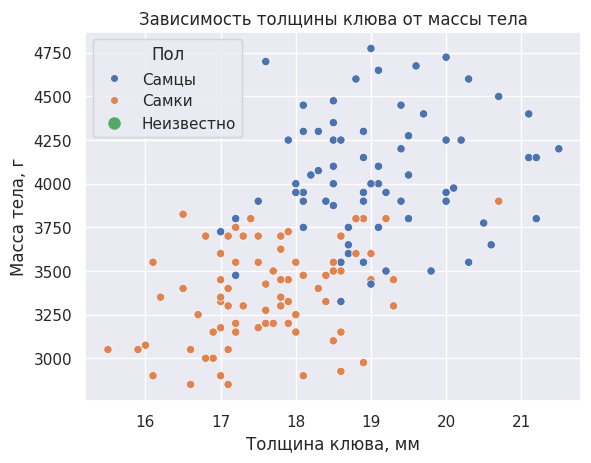

In [ ]:
sns.scatterplot(
    penguins_adelie, x=penguins_adelie.bill_depth_mm, y=penguins_adelie.body_mass_g,
    hue="sex", palette=palette_sex, hue_order=[hue_male, hue_female, hue_unknown]
).set(
    title="Зависимость толщины клюва от массы тела", xlabel="Толщина клюва, мм", ylabel="Масса тела, г"
)
plt.legend(
    handles=[marker_male, marker_female, marker_unknown],
    labels=[label_male, label_female, label_unknown],
    title="Пол"
);

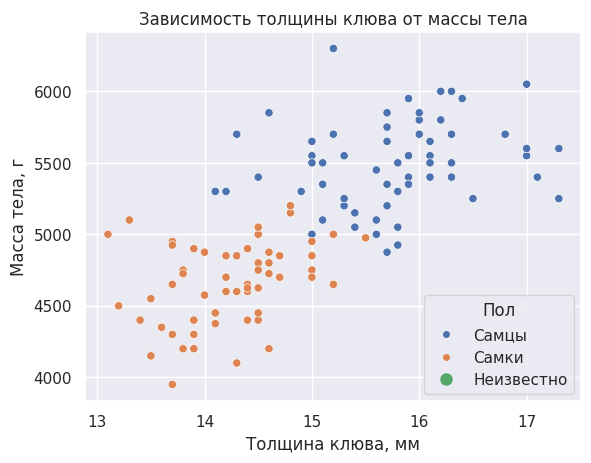

In [ ]:
sns.scatterplot(
    penguins_gentoo, x=penguins_gentoo.bill_depth_mm, y=penguins_gentoo.body_mass_g,
    hue="sex", palette=palette_sex, hue_order=[hue_male, hue_female, hue_unknown]
).set(
    title="Зависимость толщины клюва от массы тела", xlabel="Толщина клюва, мм", ylabel="Масса тела, г"
)
plt.legend(
    handles=[marker_male, marker_female, marker_unknown],
    labels=[label_male, label_female, label_unknown],
    title="Пол"
);

Объединение наборов данных, разделённых по видам.

In [ ]:
penguins_new = pd.concat([penguins_adelie, penguins_gentoo, penguins_chinstrap])
penguins_new.describe(include="object")

,species,island,sex
count,342,342,342
unique,3,3,2
top,Adelie,Biscoe,female
freq,151,167,172


Пропусков больше нет. Теперь можно посмотреть на новое распределение пингвинов по полу.

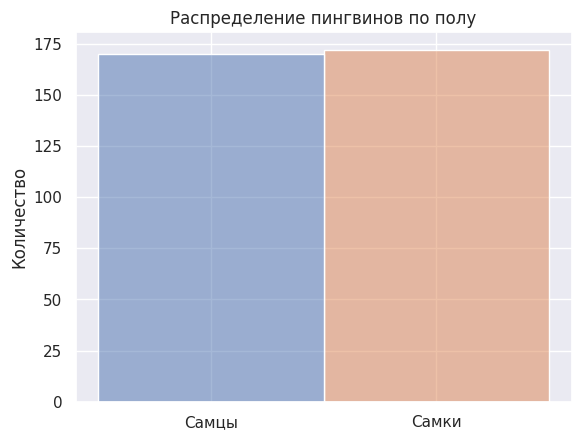

In [ ]:
sns.histplot(penguins_new, x=penguins_new.sex, hue="sex", legend=None).set(
    title="Распределение пингвинов по полу", xlabel="", ylabel="Количество",
    xticks=range(2), xticklabels=labels_sex
);

Таким образом, пропуски в наборе данных заполнены предполагаемыми значениями.

# Метод главных компонент

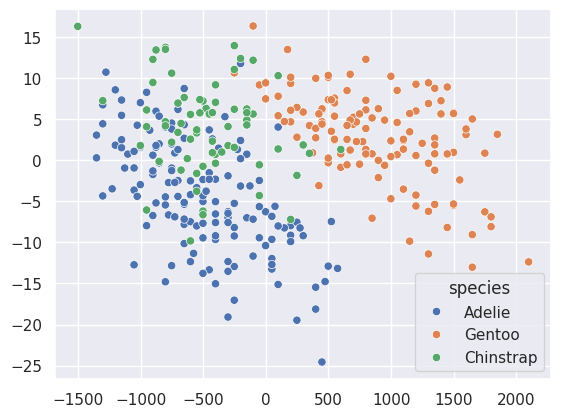

In [ ]:
pca = PCA(2)
penguins_pca = pca.fit_transform(penguins_new.select_dtypes(include="number"))
sns.scatterplot(x=penguins_pca[:, 0], y=penguins_pca[:, 1], hue=penguins_new.species);